### Install and Import Necessary Libraries

In [1]:
pip install easyesn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=93406f727be206a6de41f75df68bb0d335d8a307de14816ccc5e8e33e970058b
  Stored in directory: c:\users\shour\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [420]:
import numpy as np

from easyesn.optimizers import GradientOptimizer
from easyesn import PredictionESN
from easyesn.optimizers import GridSearchOptimizer
from easyesn import helper as hlp
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

import pandas as pd
from pandas_datareader import data
from datetime import datetime

np.random.seed(42)

### Data Preparation

In [421]:
start = datetime.strptime('2004-01-02','%Y-%m-%d')
end = datetime.strptime('2009-6-30','%Y-%m-%d')

In [422]:
df = data.DataReader('APA',start=start, end=end, data_source='yahoo')
df = df[:1500]['Close']

In [423]:
scaler=MinMaxScaler(feature_range=(0,1))
data = scaler.fit_transform(np.array(df).reshape(-1,1))

In [424]:
training_size=int(len(data)*0.65)
test_size=len(data)-training_size
train_data,test_data=data[0:training_size,:],data[training_size:len(data),:]

In [425]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append([dataset[i+time_step,0]])
    return np.array(dataX), np.array(dataY)

In [426]:
time_step = 10 # Use 100 data points to predict the 101st data point
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

### Model Creation and Fitting

In [432]:
esn = PredictionESN(n_input=time_step, n_output=1, n_reservoir=50, leakingRate=0.2, regressionParameters=[1e-6], solver="lsqr", feedback=True)

In [433]:
esn.fit(X_train, y_train, transientTime="Auto", verbose=1)

100% (797 of 797) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


0.00986877096478935

### Prediction

In [434]:
train_predict=esn.predict(X_train)
test_predict=esn.predict(X_test)
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

### Visualization

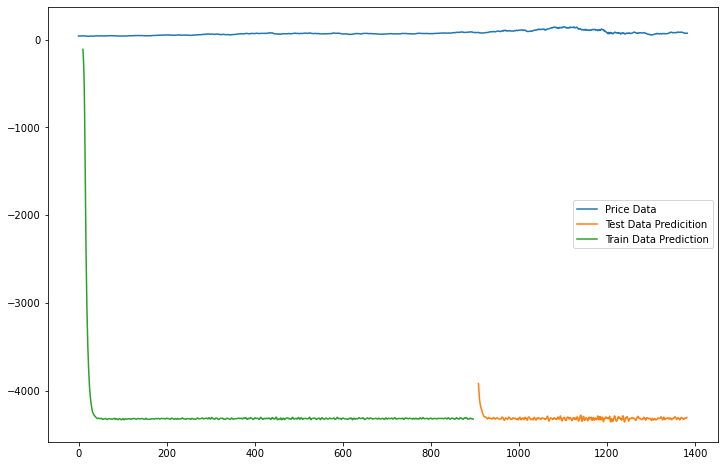

In [435]:
look_back=time_step
trainPredictPlot=np.empty_like(data)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:] = train_predict

testPredictPlot=np.empty_like(data)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data)-1,:] = test_predict

plt.figure(figsize=(12,8))
plt.plot(scaler.inverse_transform(data))
plt.plot(testPredictPlot)
plt.plot(trainPredictPlot)
plt.legend(['Price Data','Test Data Predicition','Train Data Prediction'])

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

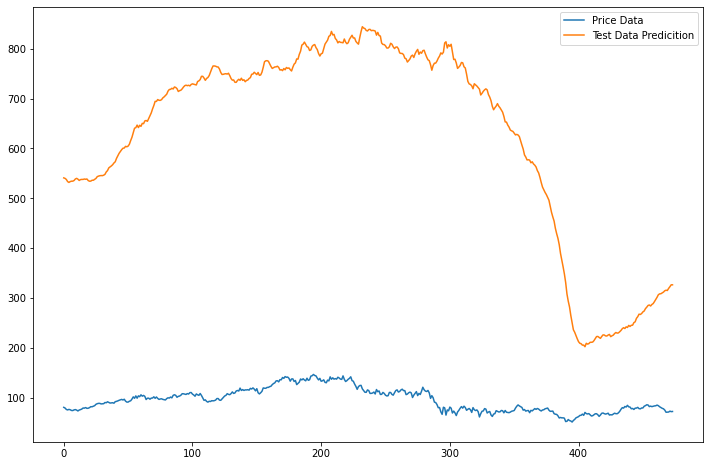

In [431]:
plt.figure(figsize=(12,8))
plt.plot(scaler.inverse_transform(data)[len(train_predict)+(look_back*2)+1:len(data)-1])
plt.plot(test_predict)
plt.legend(['Price Data','Test Data Predicition'])
plt.show

In [415]:
opt = GridSearchOptimizer(esn)

In [416]:
#validationLosses, fitLosses, inputScalings, leakingRates, spctral_radius, learningRates = opt.optimizeParameterForTrainError(X_train, y_train, X_test, y_test, epochs=150, transientTime=100)
validationLosses, fitLosses, penalties = opt.optimizePenalty(X_train, y_train, X_test, y_test, epochs=150, transientTime=100)

AttributeError: 'GridSearchOptimizer' object has no attribute 'optimizePenalty'

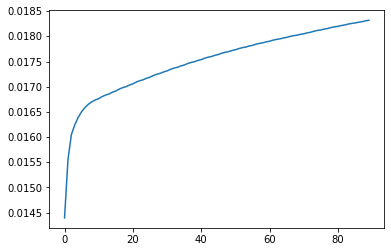

In [404]:
plt.plot(validationLosses)

In [405]:
validationLosses

[0.014396253988908507,
 0.015550353036760214,
 0.0160488171882296,
 0.01624483861605383,
 0.01639283815492589,
 0.016505035818117107,
 0.01658964213903719,
 0.016653360624764794,
 0.01670113109449107,
 0.016736955357066586,
 0.016763778854808457,
 0.01680387069045535,
 0.016833883900667902,
 0.016856393250947222,
 0.016889930445329562,
 0.016915047718678033,
 0.016952775969306864,
 0.016980846072602925,
 0.017001859062187097,
 0.017033498428181842,
 0.01705694539350225,
 0.017092418742717216,
 0.01711877170173379,
 0.01713821095948001,
 0.017167982313012836,
 0.01718981348795919,
 0.017223219189497242,
 0.01724776085445162,
 0.01726581339962124,
 0.017293835465098908,
 0.017314132630745677,
 0.017345406374886418,
 0.01736828366715366,
 0.017385071907572713,
 0.017411238484341604,
 0.017430184896975325,
 0.01745964275814436,
 0.017480901284350637,
 0.01749638940103594,
 0.017520917011892997,
 0.017538460920278838,
 0.017566024186533125,
 0.017585712082502536,
 0.017600197394089426,
 0.0

In [406]:
fitLosses

[0.009900877806120284,
 0.009900840544427523,
 0.009900837858176269,
 0.009900822128673624,
 0.00990081812679702,
 0.009900811070984093,
 0.009900801216901641,
 0.00990078896855302,
 0.009900774719887366,
 0.00990075875529832,
 0.009900741439571589,
 0.009900740752390532,
 0.00990072402573711,
 0.009900706122993931,
 0.009900704702945433,
 0.00990068728469262,
 0.009900686756393906,
 0.00990066996117678,
 0.009900651831678528,
 0.009900650540661554,
 0.009900632920044075,
 0.009900632595839313,
 0.00990061562757559,
 0.009900597285820824,
 0.009900596099881464,
 0.009900578232677214,
 0.009900578046514829,
 0.009900560827598543,
 0.009900542207818483,
 0.00990054105955075,
 0.009900522971044459,
 0.009900522760103168,
 0.009900505281553524,
 0.009900486355715341,
 0.009900485205670544,
 0.009900466823541761,
 0.009900466697232177,
 0.00990044899488949,
 0.009900429755082011,
 0.009900428558191635,
 0.009900409859284904,
 0.009900409650591005,
 0.009900391561447753,
 0.00990037200619715

In [407]:
leakingRates

[0.04099589657798539,
 0.04149473186717506,
 0.04168191480914011,
 0.0417521150874623,
 0.04180475521174477,
 0.04184424660182099,
 0.04187386534401094,
 0.041896076845587174,
 0.04191272516563577,
 0.04192522063286989,
 0.04193459027901737,
 0.04194864422677276,
 0.04195918717815026,
 0.04196708805682069,
 0.04197894343856285,
 0.04198783864215682,
 0.04200118093316158,
 0.042011184745667084,
 0.042018690295323693,
 0.042029946485365614,
 0.042038390155671505,
 0.04205105380182213,
 0.0420605512673312,
 0.04206767325873766,
 0.04207835727974563,
 0.04208637178004207,
 0.042098392842254403,
 0.04210740880569008,
 0.04211416854277418,
 0.042124312036513865,
 0.042131918504488455,
 0.042143329110245806,
 0.042151885251414695,
 0.04215830410729659,
 0.042167932646529536,
 0.04217515093390241,
 0.04218597296608149,
 0.04219409165872822,
 0.042200182576106755,
 0.04220932133469174,
 0.04221617516842353,
 0.04222645562786064,
 0.042234166791333155,
 0.042239949723747845,
 0.04224862490361395